In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df =pd.read_csv(r'C:\Users\SRK\Desktop\siva_python\classification\day1\US_Heart_Patients.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [5]:
df.TenYearCHD.value_counts(normalize = True)

0    0.848113
1    0.151887
Name: TenYearCHD, dtype: float64

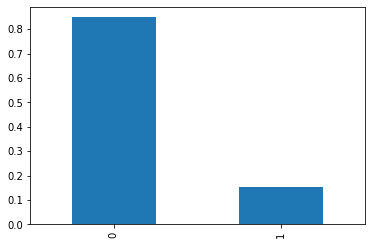

In [6]:
df.TenYearCHD.value_counts(normalize = True).plot(kind = 'bar')
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [8]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
df.fillna(method ='ffill',inplace =True)

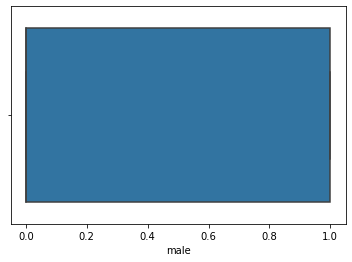

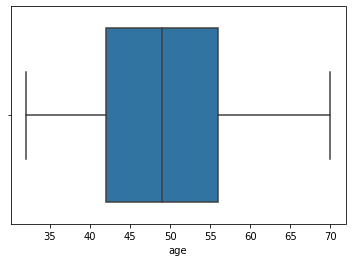

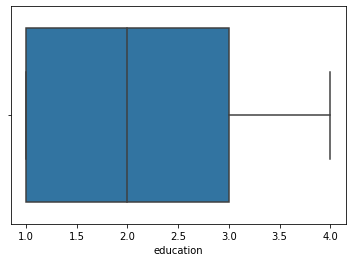

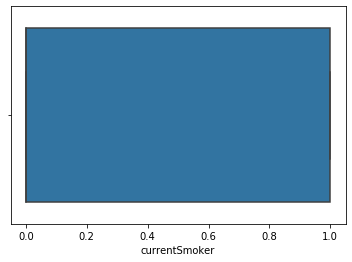

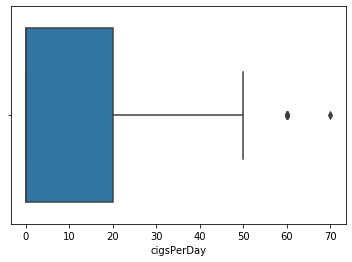

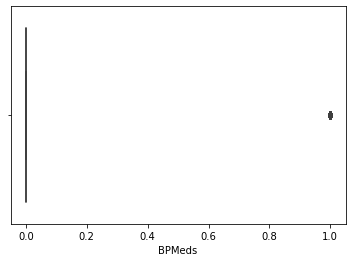

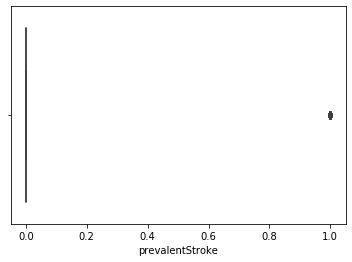

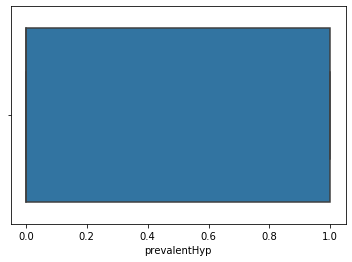

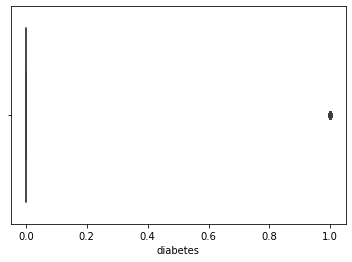

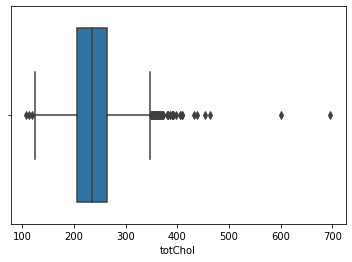

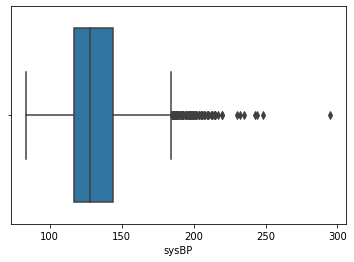

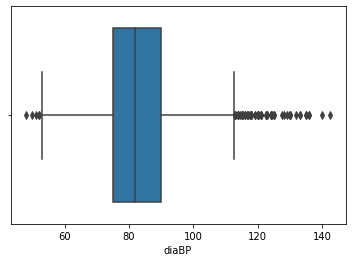

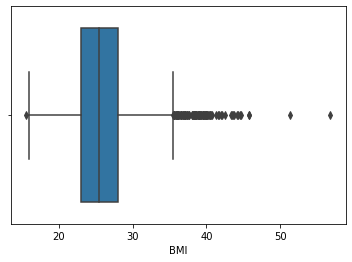

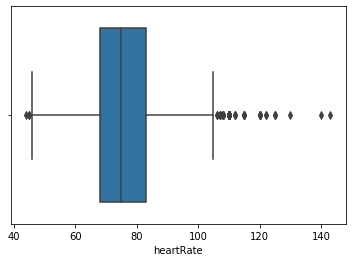

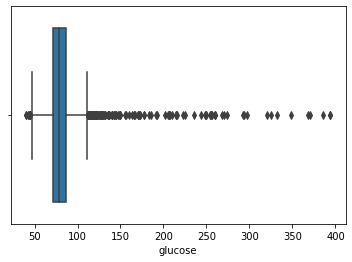

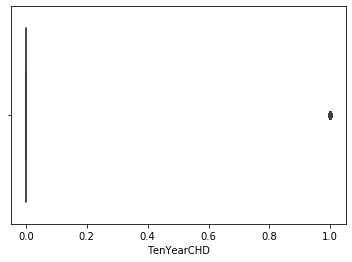

In [10]:
#cols = [i for i in df.select_dtypes!='object']
for j in df.columns:
    sns.boxplot(df[j])
    #df[j].plot(kind ='boxplot')
    plt.show()

In [11]:
import statsmodels.api as sm


In [12]:
y = df.TenYearCHD
x = df.drop(columns ='TenYearCHD')

In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
dtypes: float64(9), int64(6)
memory usage: 497.0 KB


In [14]:
xc = sm.add_constant(x)
model = sm.Logit(y,xc)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Tue, 11 Feb 2020   Pseudo R-squ.:                  0.1107
Time:                        10:30:45   Log-Likelihood:                -1606.2
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 7.904e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9749      0.659    -12.106      0.000      -9.266      -6.684
male                0.5094      0.100      5.076      0.000       0.313       0.706
age                 0.0620      0.006      9.972      0.000       0.050       0.074
education          -0.0156      0.046     -0.343      0.731      -0.105       0.074
currentSmoker       0.0139      0.144      0.097      0.923      -0.268       0.296
cigsPerDay          0.0209      0.006      3.681      0.000       0.010       0.032
BPMeds              0.2311      0.219      1.054      0.292      -0.198       0.661
prevalentStroke     0.9706      0.441      2.199      0.028       0.106       1.836
prevalentHyp        0.2346      0.128      1.828      0.068      -0.017       0.486
diabetes            0.3055      0.281      1.086      0.278      -0.246       0.857
totChol             0.0017      0.001      1.711      0.087      -0.000       0.004
sysBP               0.0142      0.004      4.012      0.000       0.007       0.021
diaBP              -0.0029      0.006     -0.477      0.633      -0.015       0.009
BMI                 0.0019      0.012      0.162      0.872      -0.021       0.025
heartRate          -0.0014      0.004     -0.354      0.723      -0.009       0.006
glucose             0.0055      0.002      2.794      0.005       0.002       0.009
===================================================================================
"""

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vifff = pd.DataFrame()

vifff['factors'] =[vif(xc.values,i) for i in range(xc.shape[1])]
vifff["features"] = xc.columns
vifff

,factors,features
0,195.577022,const
1,1.196376,male
2,1.372623,age
3,1.052969,education
4,2.495886,currentSmoker
5,2.622972,cigsPerDay
6,1.099504,BPMeds
7,1.018958,prevalentStroke
8,2.052190,prevalentHyp
9,1.509896,diabetes


### VIF table shows that there is no serious multi collinearity

## backward elimination to drop varaibles one by one

In [16]:
cols =[i for i in xc.columns]


p =[]
while len(cols)>2:
    xc = xc[cols]
    model = sm.Logit(y,xc).fit().pvalues
    p =pd.Series(model.values[1:],index = xc.columns[1:])
    pmax = max(p)
    pid = p.idxmax()
    
    if pmax>0.05:
        cols.remove(pid)
        print('column removed',pid,pmax)
    else:
        break
cols            

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7
column removed currentSmoker 0.9230836384454568
Optimization terminated successfully.
         Current function value: 0.378832
         Iterations 7
column removed BMI 0.8799600997167144
Optimization terminated successfully.
         Current function value: 0.378834
         Iterations 7
column removed heartRate 0.7256836903790043
Optimization terminated successfully.
         Current function value: 0.378849
         Iterations 7
column removed education 0.7258343500756252
Optimization terminated successfully.
         Current function value: 0.378864
         Iterations 7
column removed diaBP 0.6189568890550994
Optimization terminated successfully.
         Current function value: 0.378893
         Iterations 7
column removed BPMeds 0.2839466361427202
Optimization terminated successfully.
         Current function value: 0.379025
         Iterations 7
column removed diabetes 0.25376

['const', 'male', 'age', 'cigsPerDay', 'prevalentStroke', 'sysBP', 'glucose']

In [17]:
model = sm.Logit(y,xc[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.379946
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Tue, 11 Feb 2020   Pseudo R-squ.:                  0.1080
Time:                        10:30:46   Log-Likelihood:                -1611.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 3.457e-81
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4018      0.387    -21.723      0.000      -9.160      -7.644
male                0.4911      0.097      5.057      0.000       0.301       0.681
age                 0.0646      0.006     10.922      0.000       0.053       0.076
cigsPerDay          0.0211      0.004      5.513      0.000       0.014       0.029
prevalentStroke     1.0512      0.436      2.411      0.016       0.197       1.906
sysBP               0.0172      0.002      8.576      0.000       0.013       0.021
glucose             0.0068      0.002      4.370      0.000       0.004       0.010
===================================================================================
"""

In [18]:
## Age ## intrepeting logistic regression.
#1. positive sign of age coefficient indicates that probability of chd increases with age.

# 2.when age increases by one year , log(odds) of chd increases by 0.0646
exp_coef = np.exp(result.params)
pd.DataFrame({'coefs':result.params,'exp_coef':exp_coef})
# 3.e^b-1 --> when age increase by 1 year ,change in  odds(CHD), increase by 6%;
#             1.066-1--> 0.066*100 ----> 6.6%


,coefs,exp_coef
const,-8.401794,0.000224
male,0.491120,1.634145
age,0.064620,1.066753
cigsPerDay,0.021130,1.021355
prevalentStroke,1.051193,2.861061
sysBP,0.017156,1.017304
glucose,0.006751,1.006774


# male 

In [19]:
1. positive sign of male coef  indicte that the  male got more chance of chd, compared to female.
2. log(odds) of chd  for male is higher by 0.49 compared to female.[log(oddsmale)-log(oddsfemale) =0.49]
3. Odds of male/odds(female) = 1.63; odds(male) is 63% higher compared to odds(female).

SyntaxError: invalid syntax (<ipython-input-19-7472cbac2ac1>, line 1)

In [20]:
xc[cols].to_csv('chd_predict.csv')

In [21]:
prob = result.predict(xc[cols])

In [22]:
prob

0       0.045124
1       0.055181
2       0.151048
3       0.364153
4       0.105343
          ...   
4235    0.114107
4236    0.076506
4237    0.116199
4238    0.081596
4239    0.081216
Length: 4240, dtype: float64

In [23]:
type(prob)

pandas.core.series.Series

In [24]:
prob.name = 'prob'

In [25]:
df_pred = pd.DataFrame([prob,y]).T

In [26]:
df_pred['pred']= df_pred['prob'].apply(lambda x:0 if x<0.5 else 1)

In [27]:
df_pred.head()

,prob,TenYearCHD,pred
0,0.045124,0.0,0
1,0.055181,0.0,0
2,0.151048,0.0,0
3,0.364153,1.0,0
4,0.105343,0.0,0


In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [29]:
cm =confusion_matrix(df_pred.TenYearCHD,df_pred.pred)
cm

array([[3571,   25],
       [ 593,   51]], dtype=int64)

(2.0, 0.0)

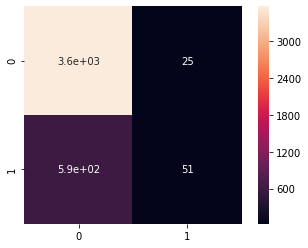

In [60]:
ax =sns.heatmap(cm,annot=True,square=True,)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [33]:
accuracy_score(df_pred.TenYearCHD,df_pred.pred)

0.8542452830188679

In [35]:
print(classification_report(df_pred.TenYearCHD,df_pred.pred))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      3596
         1.0       0.67      0.08      0.14       644

    accuracy                           0.85      4240
   macro avg       0.76      0.54      0.53      4240
weighted avg       0.83      0.85      0.80      4240



# ROC analysis:


In [37]:
from sklearn.metrics import roc_auc_score,roc_curve

In [39]:
print('auc for model is ',roc_auc_score(df_pred.TenYearCHD,df_pred.prob))

auc for model is  0.728857417489412


In [41]:
fpr,tpr,thresholds = roc_curve(df_pred.TenYearCHD,df_pred.prob)

In [42]:
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , ..., 0.99805339, 0.99805339,
        1.        ]),
 array([0.        , 0.0015528 , 0.00465839, ..., 0.9984472 , 1.        ,
        1.        ]),
 array([1.91102518, 0.91102518, 0.88966609, ..., 0.02049044, 0.02022754,
        0.01756297]))

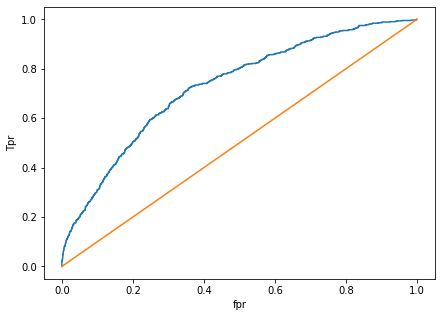

In [51]:
plt.figure(figsize =(7,5))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('fpr')
plt.ylabel('Tpr')

plt.show()

In [52]:
thresholds[0] =thresholds[0] -1

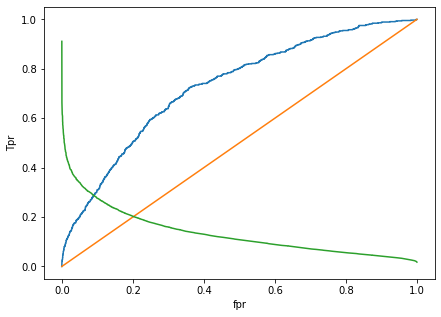

In [54]:
plt.figure(figsize =(7,5))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.plot(fpr,thresholds)
plt.xlabel('fpr')
plt.ylabel('Tpr')

plt.show()
# TPr =80%
#fpr =58%
# threshold = 0.15
# if tpr = 60%
# fpr = 30%
# threshold =0.2

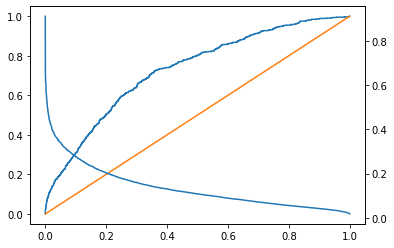

In [59]:
fig,ax = plt.subplots()
ax.plot(fpr,tpr)
ax.plot(fpr,fpr)
ax1 = ax.twinx()

ax1.plot(fpr,thresholds,label='threshold')
plt.show()

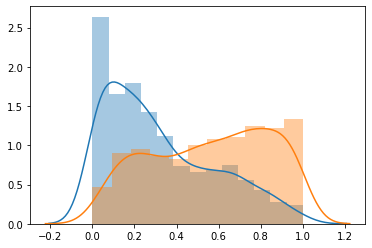

In [49]:
sns.distplot(fpr)
sns.distplot(tpr)